### Explicação da célula 1
Esse código está preparando um ambiente de programação para a análise de dados e modelagem estatística, focando especificamente em modelos de regressão logística. As bibliotecas e os pacotes importados servem como um kit de ferramentas, onde cada um tem uma função específica para o processo de análise.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

### Explicação da célula 2
Este código carrega um arquivo CSV dairetamente do no seu github onde tem os dados da cannoli e o exibe no console
- Carregamento do dataset em um DataFrame.


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/2025-2-NCC5/Projeto2/main/cannoli.csv')
print(data.to_string())

                                      id       name  taxid gender dateofbirth  status                          externalcode              isenriched             enrichedat              enrichedbt                   createdat    createdby                   updatedat    updatedby
0   2b46d0cf-c18a-43f3-98e5-db9fa61b5303   Fernanda    NaN    NaN  1989-12-26       1                                   NaN                     NaN                    NaN                     NaN  2025-08-22 13:01:14.299+00      Support    2025-08-22 13:01:14.3+00      Support
1   92f6dfd4-06f2-4b82-b281-508f17de200d      Diogo    0.0      O  2002-10-11       1  74ec1a5f-7546-4d38-92bc-9d2d39b962c0                     NaN                    NaN                     NaN  2025-07-03 22:19:02.029+00        Admin  2025-08-08 16:51:03.225+00  HorusBI App
2   97685b51-39fd-48c2-9f2e-79a3ee6f931c     Karina  100.0    NaN  1988-08-16       1  6b509f6c-8f2e-42ab-a8b0-f1f1f28ab460                     NaN                    Na

### Explicação da célula 3

Esse código define uma função em Python chamada freq que calcula a frequência absoluta e percentual de valores em uma série do pandas.




In [ ]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts(dropna=False)
    percentual = round((contagem / x.shape[0]) * 100, 3)

    res = pd.DataFrame({'n': contagem, 'perc': percentual})
    res.index.name = 'values'

    if plot:
        sns.countplot(x)
        plt.show()

    return res

### Explicação da célula 4

Esse código Python que você forneceu calcula a distribuição percentual dos valores na coluna.


In [ ]:
(data.gender.value_counts() / data.shape[0]) * 100

,count
gender,
O,31.666667
N,21.666667
M,21.666667
F,21.666667


### Explicação da célula 5
Esse código que você forneceu é uma função Python chamada freq. O objetivo dela é calcular e exibir a frequência de valores em uma série de dados, como uma coluna em uma tabela.


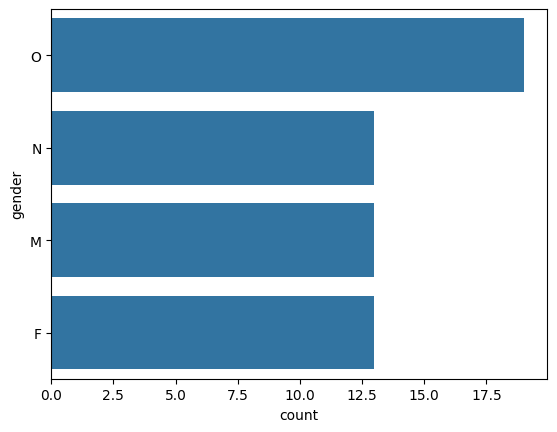

,n,perc
values,,
O,19,31.667
M,13,21.667
N,13,21.667
F,13,21.667
NaN,2,3.333


In [ ]:
freq(data.gender, plot=True)

### Explicação da célula 6
Esse código Python que você forneceu é utilizado para criar um gráfico de barras que visualiza a contagem dos valores na coluna status de um conjunto de dados.


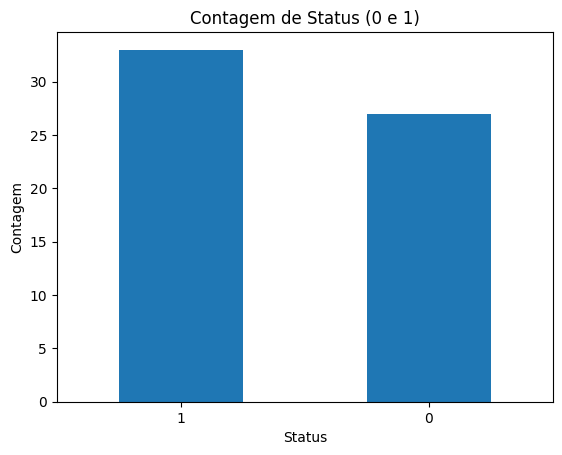

In [ ]:
contagem_status = data['status'].value_counts()

contagem_status.plot(kind='bar', rot=0)

plt.title('Contagem de Status (0 e 1)')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()

### Explicação da célula 7
Esse codigo gera um resumo estatístico da coluna taxid para uma análise exploratória de dados do pandas.

In [ ]:
data.taxid.describe()

,taxid
count,58.000000
mean,490.224138
std,317.352538
min,0.000000
25%,193.250000
50%,493.000000
75%,805.250000
max,999.000000


### Explicação da célula 8
Esse código cria um gráfico de box plot, que é uma visualização útil para comparar a distribuição de uma variável numérica (taxid) entre diferentes grupos (gender).


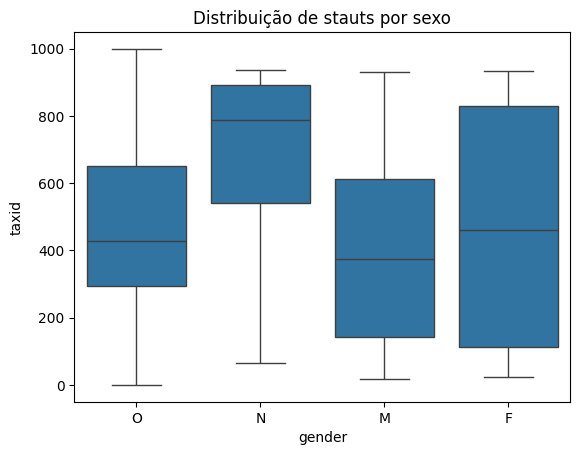

In [ ]:
sns.boxplot(x='gender', y='taxid', data=data)
plt.title('Distribuição de id por sexo')
plt.show()

### Explicação da célula 9
Esse codigo converte o tipo de dado da coluna 'status' do seu DataFrame para a categoria category. Para a otimização de memória e melhoria de desempenho


In [ ]:

data['status'] = data['status'].astype('category')

### Explicação da célula 10
 Esse código ajusta um modelo de regressão logística para entender como as variáveis gender e isenriched influenciam o status e, em seguida, imprime um relatório estatístico detalhado sobre esses relacionamentos.

In [ ]:
modelo = smf.glm(formula='status ~ gender + isenriched', data=data,
                 family=sm.families.Binomial()).fit()
print(modelo.summary())

                     Generalized Linear Model Regression Results                      
Dep. Variable:     ['status[0]', 'status[1]']   No. Observations:                   49
Model:                                    GLM   Df Residuals:                        0
Model Family:                        Binomial   Df Model:                           48
Link Function:                          Logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:            -2.8548e-09
Date:                        Sat, 20 Sep 2025   Deviance:                   5.7097e-09
Time:                                18:34:33   Pearson chi2:                 2.85e-09
No. Iterations:                            22   Pseudo R-squ. (CS):             0.7491
Covariance Type:                    nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


### Explicação da célula 11
Esse código pega os coeficientes do seu modelo, converte-os em odds ratios e os exibe, tornando os resultados muito mais fáceis de interpretar e comunicar.


In [ ]:
print(np.exp(modelo.params[1:]))

gender[T.M]                             2.131634e-03
gender[T.N]                             1.396756e+08
gender[T.O]                             1.660921e+01
isenriched[T.1.942.743.284.045.550]     2.854594e-14
isenriched[T.10.082.710.795.990.000]    2.854594e-14
isenriched[T.10.560.222.470.697.000]    6.552512e+10
isenriched[T.12.298.229.434.392.900]    3.394478e-21
isenriched[T.13.341.895.952.883.600]    1.396756e+08
isenriched[T.15.327.709.979.875.400]    6.552512e+10
isenriched[T.16.039.640.816.526.500]    3.394478e-21
isenriched[T.16.392.021.283.162.500]    3.394478e-21
isenriched[T.18.662.991.264.773.600]    2.224236e-10
isenriched[T.19.166.384.358.304.300]    1.000000e+00
isenriched[T.2.727.061.338.092.280]     1.396756e+08
isenriched[T.2.904.516.745.445.760]     3.394478e-21
isenriched[T.23.516.462.084.731.900]    1.000000e+00
isenriched[T.3.220.577.614.490.790]     2.854594e-14
isenriched[T.3.640.583.048.837.990]     1.000000e+00
isenriched[T.3.792.452.972.383.370]     4.7412

### Explicação da célula 12
O código (np.exp(modelo.params[1:]) - 1) * 100 transforma os odds ratios do seu modelo de regressão em variação percentual. Essa forma de interpretar os resultados é muito mais intuitiva do que os odds ratios ou os próprios coeficientes, pois ela expressa o impacto de cada variável de forma clara e direta.




In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

,0
gender[T.M],-9.978684e+01
gender[T.N],1.396756e+10
gender[T.O],1.560921e+03
isenriched[T.1.942.743.284.045.550],-1.000000e+02
isenriched[T.10.082.710.795.990.000],-1.000000e+02
isenriched[T.10.560.222.470.697.000],6.552512e+12
isenriched[T.12.298.229.434.392.900],-1.000000e+02
isenriched[T.13.341.895.952.883.600],1.396756e+10
isenriched[T.15.327.709.979.875.400],6.552512e+12
isenriched[T.16.039.640.816.526.500],-1.000000e+02


### Explicação da célula 13
Em resumo, esse código mostra o ciclo completo de preparação de dados para um modelo de regressão logística e, crucialmente, demonstra como garantir que novos dados estejam no formato exato que o modelo espera para realizar uma previsão.


In [ ]:
y = data['status']
X = pd.get_dummies(data[['gender', 'isenriched']], drop_first=True)

model = LogisticRegression(penalty=None, solver='newton-cg')
model.fit(X, y)

colunas_treino = X.columns

novo_registro = pd.DataFrame({
    'gender': ['F'],
    'isenriched': [1]
})

novo_registro_dummies = pd.get_dummies(novo_registro, drop_first=True)
novo_registro_alinhado = novo_registro_dummies.reindex(columns=colunas_treino, fill_value=0)

### Explicação da célula 14
Em essência, a linha model.fit(X, y) faz com que o modelo analise os dados em X e y para encontrar a melhor relação entre eles.


In [ ]:
model.fit(X, y)

LogisticRegression(penalty=None, solver='newton-cg')

### Explicação da célula 15

Essa parte é a representação de um modelo de Regressão Logística com todos os seus parâmetros padrão


In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty='none', solver='newton-cg')

### Explicação da célula 16
O codigo exibe os coeficientes do seu modelo de regressão logística após ele ter sido treinado.


In [ ]:
print(model.coef_)

[[  0.13155945  -0.69575283   5.64795876   2.93947359   2.93947359
   -7.75462448   7.21362058  -7.92282903  -7.75462448   7.21362058
    7.21362058   6.66561519  -7.25520311  -7.92282903   7.21362058
   -7.25520311   2.93947359  -7.25520311   6.54441892   6.54441892
  -12.91762588   6.54441892   6.66561519   6.66561519   6.66561519
    6.54441892   7.21362058  -7.92282903  -7.25520311   6.66561519
  -12.91762588 -12.91762588 -12.91762588  -7.92282903   7.21362058
    6.54441892 -12.91762588  -7.92282903  -7.92282903  -7.75462448
   -7.75462448   6.66561519 -12.91762588   6.66561519  -7.75462448
    7.21362058  -7.75462448 -12.91762588 -12.91762588  -7.92282903
    2.93947359]]


### Explicação da célula 17

O código yhat = model.predict_proba(X) faz com que o seu modelo de regressão logística calcule as probabilidades de cada registro em X pertencer a cada uma das classes da sua variável alvo (y).


In [ ]:
yhat = model.predict_proba(X)

### Explicação da célula 18
O código yhat = model.predict(novo_registro_alinhado) utiliza o seu modelo de machine learning treinado para fazer uma previsão para o novo registro de dados.




In [ ]:
yhat = model.predict(novo_registro_alinhado)
print(yhat)

[1]


# Metrica

### Explicação da célula 19

O código confusion_matrix(y, model.predict(X)) é usado para avaliar o desempenho do seu modelo de classificação criando uma matriz de confusão.




In [ ]:
confusion_matrix(y, model.predict(X))

array([[26,  1],
       [ 1, 32]])

### Explicação da célula 21

O código pd.crosstab(y, model.predict(X)) cria uma tabela de contingência que, na prática, funciona como uma matriz de confusão.




In [ ]:
pd.crosstab(y, model.predict(X))

col_0,0,1
status,,
0,26,1
1,1,32


### Explicação da célula 22
O código ac = accuracy_score(y, model.predict(X)) calcula a acurácia do seu modelo de classificação.




In [ ]:
ac = accuracy_score(y, model.predict(X))
ac

0.9666666666666667

### Explicação da célula 23
O código print(classification_report(y, model.predict(X))) gera um relatório completo de avaliação para o seu modelo de classificação. Ele é uma ferramenta mais detalhada e útil do que apenas a acurácia.




In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.97      0.97      0.97        33

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



### Explicação da célula 24

O código calcula o escore AUC (Área Sob a Curva ROC), que é uma métrica de avaliação muito comum para modelos de classificação binária.



In [ ]:
yhat_prob = model.predict_proba(X)
auc_score = roc_auc_score(y, yhat_prob[:, 1])

print('AUC: %0.8f' % auc_score)

AUC: 0.99719416


### Explicação da célula 25
Essa função Python, chamada plot_roc_curve, é usada para criar e exibir um gráfico de Curva ROC (Receiver Operating Characteristic). Ela visualiza a capacidade do seu modelo de classificação binária de distinguir entre as classes.




In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.6f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Explicação da célula 26

O código utiliza o seu modelo de regressão logística para gerar as probabilidades de previsão e, em seguida, usa a função que você definiu anteriormente para plotar a curva ROC e calcular o seu escore AUC.




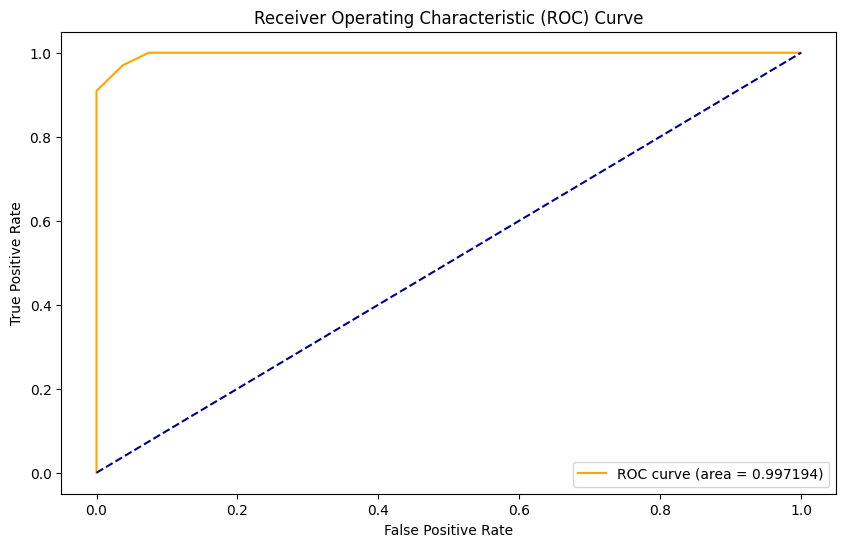

In [ ]:
yhat = model.predict_proba(X)[:, 1]
plot_roc_curve(y, yhat)

### Explicação da célula 27
O código pega um novo registro de dados e usa seu modelo de machine learning para prever a probabilidade de o status ser 1. Em seguida, ele formata e exibe essa probabilidade de uma forma mais legível.




In [ ]:
prob = model.predict_proba(novo_registro_alinhado)
print('A probabilidade de o status ser 1 é de {}%'.format(round(prob[0, 1] * 100, 2)))

A probabilidade de o status ser 1 é de 66.67%
